In [1]:
import numpy as np
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split

In [2]:
from clau_genetic_programming import *

In [3]:
     
def find_central_operator(exp):
    if exp[0] == '(' and exp[-1] == ')':
        exp = exp[1:-1]
    stack = []
    for i, char in enumerate(exp):
        if char == '(':
            stack.append(char)
        elif char == ')':
            stack.pop()
        elif char in {'+', '-', '*', '/'} and not stack:
            operator = char
            leftExp = exp[:i].strip()
            rightExp = exp[i+1:].strip()
            return operator, leftExp, rightExp

def build_tree(exp,features):
    if exp[0]=='(' and exp[-1]==')':
        operator, leftExp, rightExp = find_central_operator(exp)
        node = gp_node_function(operator,1)
        node.left = build_tree(leftExp,features)
        node.right = build_tree(rightExp,features)
        return node
    elif exp[0]=='x':
        symbol = exp[1:]
        index = np.argwhere( features==symbol)[0][0]
        node = gp_node_terminal_variable(symbol,index)
        return node

exp: x408.84
exp: x647.46
exp: x594.44
exp: x989.2
Kendall -0.5701689995434809
Pearson -0.7594442859361453


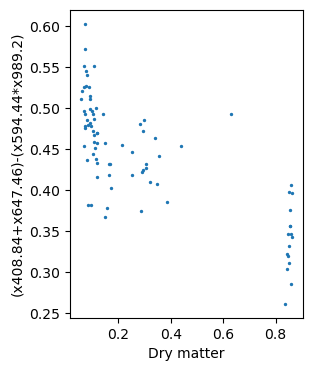

In [30]:
df = pandas.read_csv('datasets/Mushroom.csv')
Y = df.values[:,1]
X = df.values[:,2:]
features = df.columns[2:]
nvariables = X.shape[1]
Xtv, Xtest, Ytv, Ytest = train_test_split(X,Y, test_size=0.33, random_state=0, shuffle=True)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtv,Ytv, test_size=0.5, random_state=0, shuffle=True)
exp = '((x408.84+x647.46)-(x594.44*x989.2))'
tree = build_tree(exp,features)
Ypred = tree.eval(Xtest)

Y1 = Ytest.astype(float)
Y2 = Ypred.astype(float)
print('Kendall', kendalltau(Y1,Y2)[0] )
print('Pearson',np.array(np.corrcoef(Y1,Y2))[0,1])
plt.figure(figsize=(3,4))
plt.scatter(Ytest,Ypred,s=2)
plt.xlabel('Dry matter')
plt.ylabel(exp[1:-1])
plt.show()